**Nama : Rizky Wahyudi**
**<p>Email : rizkywhyd10@gmail.com**
<p>Sumber Data : https://www.kaggle.com/ishantjuyal/emotions-in-text

In [162]:
#Memasukkan Data
import pandas as pd
df = pd.read_csv('Emotion_final.csv')

In [163]:
#Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [164]:
#Melihat 5 Data Teratas
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [165]:
#Melihat Apakah Terdapat Nilai Yang Hilang
df.isnull().values.any()

False

In [166]:
#Melakukan One Hot Encodding dan Menghapus Kolom Emotion
expression = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [167]:
#Mengubah Dataframe ke dalam Array
expression = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [168]:
#Membagi Dataset kedalam Train dan Test Set
from sklearn.model_selection import train_test_split
expression_latih, expression_test, label_latih, label_test = train_test_split(expression, label, test_size=0.2)

In [169]:
#Melakukan Tokenizer, Sequence, dan Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(expression_latih) 
tokenizer.fit_on_texts(expression_test)
 
sekuens_latih = tokenizer.texts_to_sequences(expression_latih)
sekuens_test = tokenizer.texts_to_sequences(expression_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [170]:
#Membuat Model
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [171]:
#Memanggil Callbacks untuk Menghentikan Epoch Bila Akurasi Tercapai
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi train dan validasi telah mencapai 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [172]:
#Memodelkan Data dengan Melatih dan Validasi
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
537/537 - 26s - loss: 1.3091 - accuracy: 0.4610 - val_loss: 0.8226 - val_accuracy: 0.7025
Epoch 2/20
537/537 - 23s - loss: 0.6004 - accuracy: 0.7874 - val_loss: 0.4947 - val_accuracy: 0.8371
Epoch 3/20
537/537 - 23s - loss: 0.3068 - accuracy: 0.9009 - val_loss: 0.3995 - val_accuracy: 0.8774
Epoch 4/20
537/537 - 24s - loss: 0.1960 - accuracy: 0.9396 - val_loss: 0.3801 - val_accuracy: 0.8942
Epoch 5/20
537/537 - 23s - loss: 0.1530 - accuracy: 0.9519 - val_loss: 0.4373 - val_accuracy: 0.8961
Epoch 6/20
537/537 - 23s - loss: 0.1211 - accuracy: 0.9617 - val_loss: 0.4297 - val_accuracy: 0.8984
Epoch 7/20
537/537 - 23s - loss: 0.0919 - accuracy: 0.9710 - val_loss: 0.4299 - val_accuracy: 0.8942
Epoch 8/20
537/537 - 23s - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.5077 - val_accuracy: 0.8935
Epoch 9/20
537/537 - 23s - loss: 0.0699 - accuracy: 0.9783 - val_loss: 0.4433 - val_accuracy: 0.8970
Epoch 10/20
537/537 - 23s - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.5014 - val_accura

**Loss dan Accuration Plot**

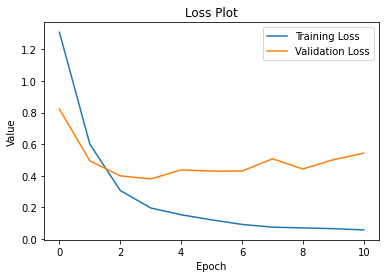

In [173]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

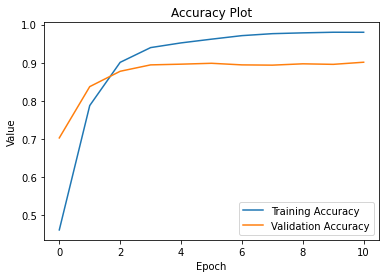

In [174]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()